### IBM Learning

Other tutorial and information on Qiskit are available on [IBM Learning](https://learning.quantum.ibm.com/) and on Qiskit [webpage](https://www.ibm.com/quantum/qiskit)

### Install and set up Qiskit
https://docs.quantum.ibm.com/start/install

```console
!pip install qiskit
!pip install qiskit-ibm-runtime
```

If you intend to use visualization functionality or Jupyter notebooks, it is recommended to install Qiskit with the extra visualization support. Note that zsh users need to put 'qiskit[visualization]' in single quotes.


```console
!pip install 'qiskit[visualization]'
```


#### Check your installation

In [1]:
import qiskit
qiskit.__version__

'1.4.2'

#### Circuit building

When creating a circuit, you'll usually create a new ```QuantumCircuit``` object, then add instructions to it in sequence.

In [2]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister

numQubit = 2
numBit = 2
q = QuantumRegister(numQubit, 'q')
c = ClassicalRegister(numBit, 'c')
qc = QuantumCircuit(q, c)


We draw the circuit with the method `draw` of `QuantumCircuit`

In [3]:
qc.draw()

q_0: 
     
q_1: 
     
c: 2/

Using `qc.draw('mpl')` we get a fancier print

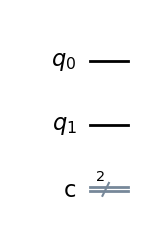

In [4]:
qc.draw('mpl')

##### Quantum Gates
We add the gates (methods of `QuantumCircuit`)
1. Identity Gate (I): Does nothing to the qubit.
```python
# Identity Gate (I)
qc.i(0)
```

2. Pauli-X Gate (X): Flips the state of the qubit.
```python
# Pauli-X Gate (X)
qc.x(0)
```

3. Pauli-Y Gate (Y): Applies a 180-degree rotation around the Y-axis.
```python
# Pauli-Y Gate (Y)
qc.y(0)
```

4. Pauli-Z Gate (Z): Applies a 180-degree rotation around the Z-axis.
```python
# Pauli-Z Gate (Z)
qc.z(0)
```

5. Hadamard Gate (H): Creates superposition.
```python
# Hadamard Gate (H)
qc.h(0)
```

6. S Gate (S): Applies a 90-degree rotation around the Z-axis.
```python
# S Gate (S)
qc.s(0)
```

7. T Gate (T): Applies a 45-degree rotation around the Z-axis.
```python
# T Gate (T)
qc.t(0)
```

8. RX Gate (RX): Applies a rotation around the X-axis by a specified angle.
```python
# RX Gate (RX)
qc.rx(1.57, 0)  # Rotate around X-axis by 1.57 radians
```

9. RY Gate (RY): Applies a rotation around the Y-axis by a specified angle.
```python
# RY Gate (RY)
qc.ry(1.57, 0)  # Rotate around Y-axis by 1.57 radians
```

10. RZ Gate (RZ): Applies a rotation around the Z-axis by a specified angle.
```python
# RZ Gate (RZ)
qc.rz(1.57, 0)  # Rotate around Z-axis by 1.57 radians
```

11. Phase Gate (P): Applies a phase shift by a specified angle.
```python
# Phase Gate (P)
qc.p(1.57, 0)  # Apply a phase shift of 1.57 radians
```

12. Controlled-NOT Gate (CX or CNOT): Flips the target qubit if the control qubit is in state |1⟩.
```python
# Controlled-NOT Gate (CX or CNOT)
qc.cx(0, 1)  # Control qubit is 0, target qubit is 1
```

13. Controlled-Z Gate (CZ): Applies a Z gate to the target qubit if the control qubit is in state |1⟩.
```python
# Controlled-Z Gate (CZ)
qc.cz(0, 1)  # Control qubit is 0, target qubit is 1
```

14. SWAP Gate (SWAP): Swaps the states of two qubits.
```python
# SWAP Gate (SWAP)
qc.swap(0, 1)  # Swap the states of qubits 0 and 1
```

15. Controlled-SWAP Gate (CSWAP or Fredkin): Swaps the states of two target qubits if the control qubit is in state |1⟩.
```python
# Controlled-SWAP Gate (CSWAP or Fredkin)
qc.cswap(0, 1, 2)  # Control qubit is 0, target qubits are 1 and 2
```

16. Toffoli Gate (CCX): Flips the target qubit if both control qubits are in state |1⟩.
```python
# Toffoli Gate (CCX)
qc.ccx(0, 1, 2)  # Control qubits are 0 and 1, target qubit is 2
```


In [5]:
numQubit = 2
numBit = 2
q = QuantumRegister(numQubit, 'q')
c = ClassicalRegister(numBit, 'c')
qc = QuantumCircuit(q, c)

qc.barrier()
qc.x(q[0])
qc.x(q[1])
qc.cx(q[1],q[0])


qc.draw()

░ ┌───┐┌───┐
q_0: ─░─┤ X ├┤ X ├
      ░ ├───┤└─┬─┘
q_1: ─░─┤ X ├──■──
      ░ └───┘     
c: 2/═════════════

##### Measurement
We add the measurements (method of `QuantumCircuit`)
  - `.measure(qubit, cbit)`

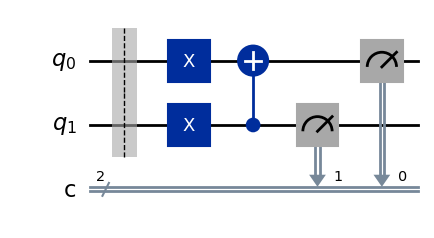

In [6]:
qc.measure(q[1],c[1])
qc.measure(q[0],c[0])

qc.draw('mpl')

We can also add classical controlled operation, for more information see [here](https://docs.quantum.ibm.com/guides/classical-feedforward-and-control-flow)

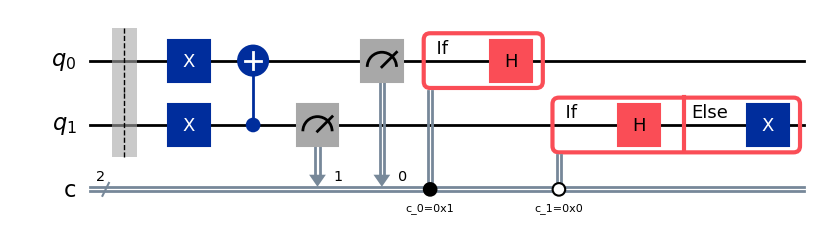

In [7]:


with qc.if_test((c[0], 1)):
    qc.h(0)
    
with qc.if_test((c[1], 0)) as else_:
    qc.h(1)
with else_:
    qc.x(1)

qc.draw('mpl')

We can use different Quantum/Classical Registers;
The command `measure_all` measure all the qubits in the circuit, and automatically add a classical register `meas` with the same number of bits as the number of qubits in the circuit.


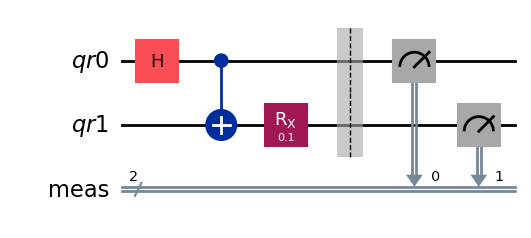

In [8]:

qr0 = QuantumRegister(1, 'qr0')
qr1 = QuantumRegister(1, 'qr1')

qc = QuantumCircuit(qr0, qr1)

qc.h(qr0[0])
'''
since we have only one qubit per register, we can omit the index
'''
qc.cx(qr0, qr1)
qc.rx(0.1, qr1)
qc.measure_all()

qc.draw('mpl')

We can use index instead of names

In [9]:
qra = QuantumRegister(2, 'qa')
qrb = QuantumRegister(2, 'qb')
cr = ClassicalRegister(2, 'creg')
qc = QuantumCircuit(qra, qrb, cr)
qc.cx(qra[0], qra[1])
qc.cy(qrb[0], qrb[1])
qc.cx(0, 1)
qc.cy(2, 3)
qc.measure(0, 0)
qc.draw()

┌─┐
  qa_0: ──■────■──┤M├
        ┌─┴─┐┌─┴─┐└╥┘
  qa_1: ┤ X ├┤ X ├─╫─
        └───┘└───┘ ║ 
  qb_0: ──■────■───╫─
        ┌─┴─┐┌─┴─┐ ║ 
  qb_1: ┤ Y ├┤ Y ├─╫─
        └───┘└───┘ ║ 
creg: 2/═══════════╩═
                   0

##### State initialization
By default quantum circuit are initialized in the state $|0\rangle$.
We can initialize the state to a specific state using the `initialize` method and `Statevector` primitive.

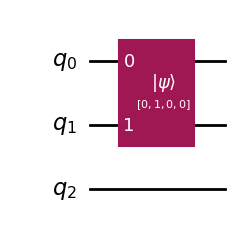

In [10]:
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(3)
sv = Statevector([0, 1, 0, 0])
qc.initialize(sv, [0, 1])

qc.draw('mpl')

### Circuit Simulation

We can simulate the circuit in various [ways](https://docs.quantum.ibm.com/guides/simulate-with-qiskit-sdk-primitives), here we use [*`QiskitAer` simulator*](https://qiskit.github.io/qiskit-aer/tutorials/1_aersimulator.html) 

#### `QiskitAer` primitive 

First we need to install `qiskit-aer`:
```console
!pip install qiskit-aer
```


We start from the same circuit:

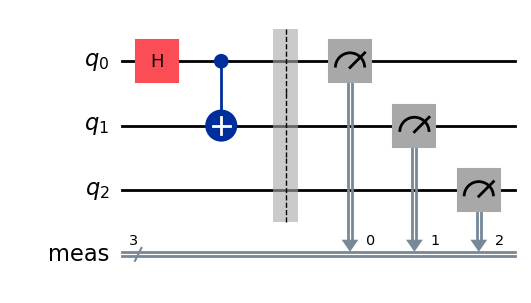

In [11]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw("mpl")

First we transpile the circuit for simulator

In [12]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city

simulator = AerSimulator()
circ = transpile(qc, simulator)

Now we run the simulation

{'011': 508, '000': 516}


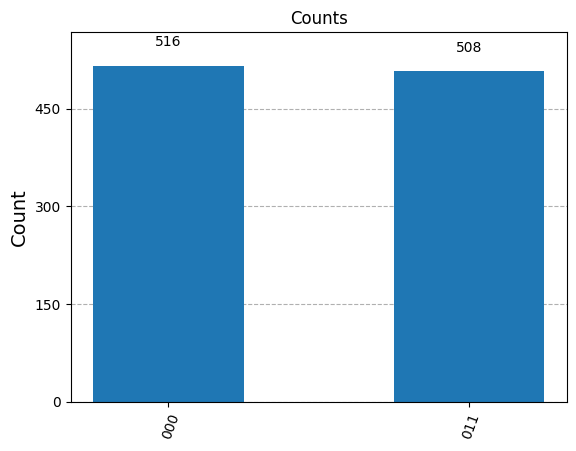

In [13]:
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Counts')

By default, the simulator performs 1024 shots. We can change this value by passing the `shots` parameter to the `run` method.

{'000': 8, '011': 2}


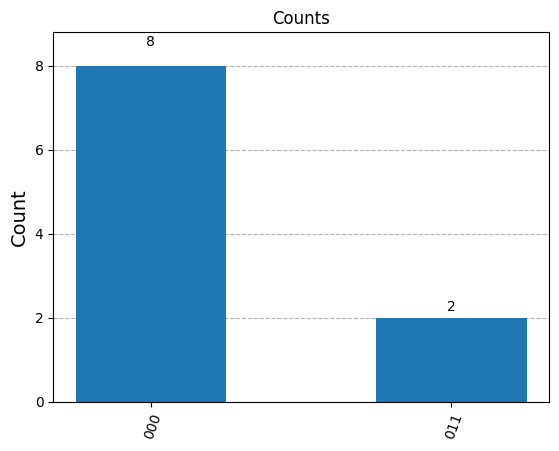

In [14]:
result = simulator.run(circ, shots=10).result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Counts')

`AerSimulator` allows to perform perfect simulation, and obtaining the exact probabilities.
To perform this we need to run `AerSimulator` with `statevector` method.


{np.str_('00'): np.float64(0.5), np.str_('11'): np.float64(0.5)}


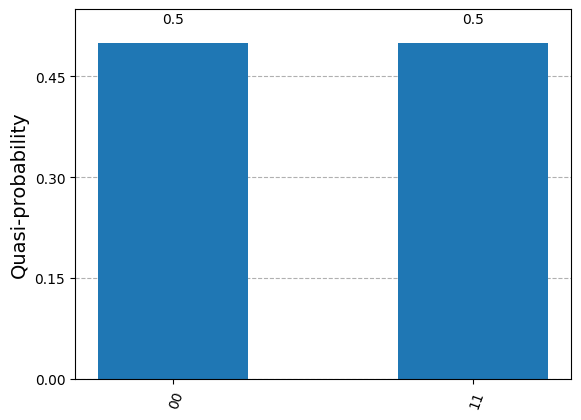

In [15]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.t(1)
circ.save_statevector()

# Transpile for simulator
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()
print(result.get_counts(circ))
plot_histogram(result.get_counts(circ))


Moreover, we can also save the statevector of the simulation, even with measurement operators.
To save the final statevector of the simulation we can append the circuit with the `save_statevector` instruction. 
If applied after any measurements we save the most probable collapsed post-measurement state

{np.str_('00'): np.float64(0.5), np.str_('11'): np.float64(0.5)}
[0.70710678+0.j  0.        +0.j  0.        +0.j  0.5       +0.5j]


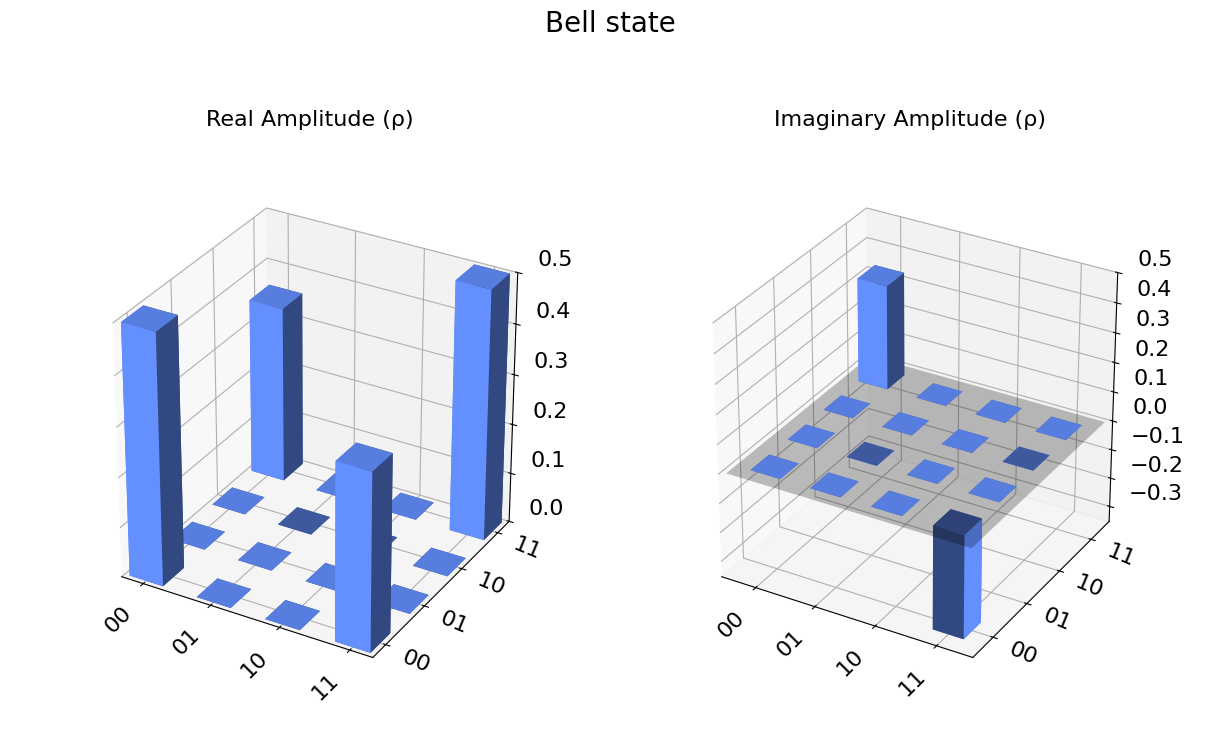

In [16]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.t(1)
circ.save_statevector()

# Transpile for simulator
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()
print(result.get_counts(circ))
statevector = result.get_statevector(circ)
print(statevector.data)
plot_state_city(statevector, title='Bell state', figsize=(12, 8))

In [17]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2,1)
circ.h(0)
circ.cx(0, 1)
circ.measure(0,0)
circ.save_statevector()


# Transpile for simulator
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()
result.get_statevector(circ).data

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

## Your Turn

To try and visualize circuit, I suggest the [Composer](https://learning.quantum.ibm.com/).

Try to implement the following circuits.

##### 1. The swap test

The swap test is a procedure in quantum computation that is used to check how much two quantum states differ, see [wikipedia](https://en.wikipedia.org/wiki/Swap_test) for more information.

<img src="Image/Quantum-swap-test-circuit-correct.png" width=600 />


##### 2. Teleportation Circuit

Build the teleportation circuit (see [here](https://pennylane.ai/qml/demos/tutorial_teleportation) for more detail) and verified that it works using the swap test

<img src="Image/teleportation1.jpeg" width=600 />


##### 3. Phase circuit

Implement this circuit (the phase gate in qiskit is `circ.p(phase,qubit)` and verified it printing the statevector.

<img src="Image/thumbnail_Image.png" width=1000 />




### If you need help
Write to me at:
`nicola.assolini@univr.it`